# برازش
<p style="color: gray;">
<small>
این درس‌نامه با کمک آقای 
<a href=https://github.com/masih00O>مسیح باقری</a>
نوشته شده است.
</small>
</p>




````{dropdown} ویدئوی جلسه
:icon: video
:open:

<div id="31607662113"><script type="text/JavaScript" src="https://www.aparat.com/embed/pfji0r0?data[rnddiv]=31607662113&data[responsive]=yes"></script></div>
````


## فیت کردن و مفهوم کای‌دو ($ \chi^2 $)

فیت کردن (Fitting) فرآیندی است که در آن سعی می‌کنیم یک مدل تئوری را به داده‌های تجربی تطبیق دهیم. در بسیاری از موارد، مدل تئوری به خوبی شناخته شده است (مثلاً در اینجا مدل گاوسی)، اما مقادیر پارامترهای مدل (مانند میانگین و انحراف معیار) نامعلوم هستند. هدف فیت کردن، پیدا کردن بهترین مقادیر برای این پارامترها است که مدل را به بهترین شکل به داده‌ها نزدیک می‌کند.

---

### ۱. **مدل تئوری و داده‌های تجربی**

در این مثال، مدل تئوری یک تابع گاوسی است:

$$
f(E; \mu, \sigma) = \exp\left( -\frac{(E - \mu)^2}{2 \sigma^2} \right)
$$

که در آن:
- $ E $: متغیر مستقل (مثلاً انرژی).
- $ \mu $: میانگین توزیع گاوسی.
- $ \sigma $: انحراف معیار توزیع گاوسی.

داده‌های تجربی نیز به صورت یک تابع گاوسی با نویز (خطا) تولید شده‌اند:

$$
\text{data}(E) = f(E; \mu_{\text{true}}, \sigma_{\text{true}}) + \text{noise}
$$

---

### ۲. **کای‌دو ($ \chi^2 $) چیست؟**

کای‌دو ($ \chi^2 $) یک معیار برای اندازه‌گیری اختلاف بین داده‌های تجربی و پیش‌بینی‌های مدل تئوری است. این کمیت به صورت زیر تعریف می‌شود:

$$
\chi^2(\mu, \sigma) = \sum_{i} \left( \frac{\text{data}(E_i) - f(E_i; \mu, \sigma)}{\text{error}(E_i)} \right)^2
$$

که در آن:
- $ \text{data}(E_i) $: مقدار داده‌ی تجربی در نقطه‌ی $ E_i $.
- $ f(E_i; \mu, \sigma) $: مقدار پیش‌بینی شده توسط مدل تئوری در نقطه‌ی $ E_i $.
- $ \text{error}(E_i) $: خطای اندازه‌گیری در نقطه‌ی $ E_i $.

---

### ۳. **فیت کردن با استفاده از $ \chi^2 $**

هدف از فیت کردن، پیدا کردن مقادیر $ \mu $ و $ \sigma $ است که $ \chi^2 $ را کمینه می‌کنند. این کار به صورت زیر انجام می‌شود:

#### الف) **محاسبه‌ی $ \chi^2 $ برای مقادیر مختلف پارامترها**
- یک شبکه از مقادیر ممکن برای $ \mu $ و $ \sigma $ ایجاد کنید.
- برای هر جفت $ (\mu, \sigma) $، مقدار $ \chi^2 $ را محاسبه کنید.

#### ب) **یافتن کمینه‌ی $ \chi^2 $**
- مقادیر $ \mu $ و $ \sigma $ که کمترین $ \chi^2 $ را تولید می‌کنند، به عنوان بهترین مقادیر برای پارامترهای مدل در نظر گرفته می‌شوند.

---

### ۴. **پیاده سازی**

در کدی که اجرا کرده‌اید، مراحل زیر انجام شده است:

#### الف) **تعریف تابع گاوسی**
تابع گاوسی با امکان اضافه کردن نویز تعریف شده است:

$$
\text{gaussian}(E, \mu, \sigma, \text{error})
$$


In [1]:
import numpy as np

def gaussian(E, mean, sigma, error):
    ret = np.exp(-(E - mean)**2 / (2 * sigma**2))
    
    if error != 0:
        errors = np.random.normal(0, error, E.shape)
        ret += ret * errors
    
    return ret

___

#### ب) **ایجاد شبکه‌ی پارامترها**
یک شبکه از مقادیر ممکن برای $ \mu $ و $ \sigma $ ایجاد شده است:

$$
\mu \in [-1, 1], \quad \sigma \in [0.1, 2]
$$

- برای بررسی رفتار توزیع گاوسی در محدوده‌های مختلف پارامترها، از شبکه‌سازی (Meshgrid) استفاده می‌شود.
-  این روش به ما امکان می‌دهد تا تمام ترکیبات ممکن از پارامترها را بررسی کنیم.
در کد زیر، از تابع np.meshgrid برای ایجاد شبکه‌ای از مقادیر انرژی (E)، میانگین‌ها (means) و انحراف معیارها (sigmas) استفاده شده است.

In [2]:
E = np.linspace(-5, 5, 20)
means = np.linspace(-1, 1, 50)
sigmas = np.linspace(0.1, 2, 100)

E_, means_, sigmas_ = np.meshgrid(E, means, sigmas)
allYs = gaussian(E_, means_, sigmas_, 0)

- E_, means_, sigmas_: شبکه‌های سه‌بعدی از مقادیر انرژی، میانگین و انحراف معیار
- allYs: مقادیر توزیع گاوسی برای تمام ترکیبات ممکن

---

#### ج) **محاسبه‌ی $ \chi^2 $**

مقدار $ \chi^2 $ برای هر جفت $ (\mu, \sigma) $ محاسبه شده است:

$$
\chi^2 = \sum_{i} (\text{data}(E_i) - f(E_i; \mu, \sigma))^2
$$


In [3]:
data = gaussian(E, 0, 1, 0.1)
experiment_new = np.repeat(data[np.newaxis, :, np.newaxis], means.size, axis=0)
experiment_new = np.repeat(experiment_new, sigmas.size, axis=2)

chi2 = np.sum((experiment_new - allYs)**2, 1)

به موارد زیر در کد بالا باید دقت کنید:

- استفاده از متد `numpy.repeat` برای ساختن شبکه ای سه بعدی از داده‌ها
- محاسبه‌ی $\chi^2$ با جمع زدن روی محور شماره‌ی یک : یعنی مقادیر x

#### د) **پیدا کردن کمینه**

در قدم اول مقادیر $\chi^2$ را رسم می‌کنیم تا بتوانیم تغییرات آن برحسب پارامترها را ببینیم.
 برای نمایش نتایج، از نمودار دو بعدی با رنگ‌های لگاریتمی استفاده شده است


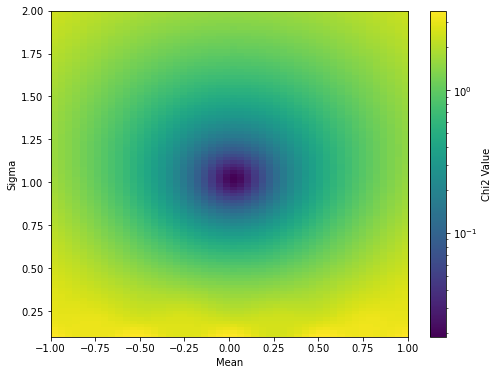

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


chi2[chi2 > 5] = 5 #برای اجتناب از کشیده شدن مقادیر بسیار زیاد در پلات
plt.figure(figsize=(8, 6))
plt.imshow(np.transpose(chi2), aspect='auto', origin='lower',
           extent=[means[0], means[-1], sigmas[0], sigmas[-1]],
           cmap='viridis', norm=LogNorm())
plt.colorbar(label='Chi2 Value')
plt.xlabel('Mean')
plt.ylabel('Sigma')
plt.show()

دقت کنید که در شکل بالا، هر رنگ نشان دهنده‌ی مقدار $\chi^2$ به ازاء مقادیر پارامترهاست. واضح است که این مقدار در نزدیکی نقطه‌ی 
$\mu =0 , \sigma =1$
کمیته می‌شود.

برای پیدا کردن دقیق نقطه‌ی کمینه، می‌توانیم از کد زیر کمک بگیریم:

In [26]:
min_args = np.unravel_index( np.argmin(chi2) , chi2.shape )
print( f'χ² is minimized at μ={means[min_args[0]]:.2f} and σ={sigmas[min_args[1]]:.2f}' )

χ² is minimized at μ=0.02 and σ=1.02


### مشتقات $\chi^2$

#### مشتق اول
بدیهی است که مشتق اول تابع $\chi^2$ در نقطه‌ی کمینه صفر است.

#### مشتقات دوم

اگر تابع $\chi^2$ را بر حسب هر کدام از متغیر ها رسم کنیم، اطلاعات خوبی را می‌توانیم ملاحظه کنیم:

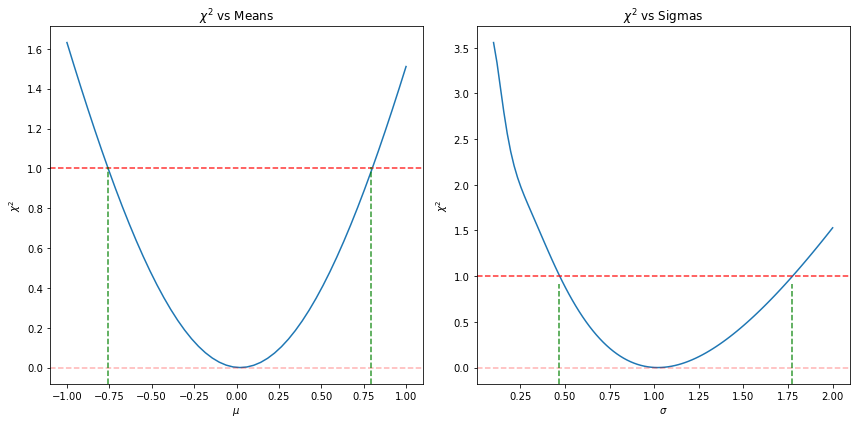

In [52]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))


minchi2 = np.min(chi2[ : , min_args[1] ])
ax0.plot(means , chi2[ : , min_args[1] ] - minchi2 )
ax0.set_title(r"$\chi^2$ vs Means")
ax0.set_xlabel(r"$\mu$")
ax0.set_ylabel(r"$\chi^2$")
ax0.axhline(1 , color='red', linestyle='--' , alpha=0.8)
ax0.axhline(0 , color='red', linestyle='--' , alpha=0.3)

intersects = means[ np.argsort(np.abs(chi2[ : , min_args[1] ] - 1- minchi2 ))[[0,1]] ]
ax0.axvline( intersects[0]  , ymax=1./np.max(chi2[: , min_args[1]  ]) , color='green', linestyle='--' , alpha=0.8)
ax0.axvline( intersects[1]  , ymax=1./np.max(chi2[: , min_args[1]  ]) , color='green', linestyle='--', alpha=0.8)

minchi2 = np.min(chi2[ min_args[0] , : ])
ax1.plot(sigmas , chi2[ min_args[0] , : ] - minchi2)
ax1.set_title(r"$\chi^2$ vs Sigmas")
ax1.set_xlabel(r"$\sigma$")
ax1.set_ylabel(r"$\chi^2$")
ax1.axhline(1 , color='red', linestyle='--', alpha=0.8)
ax1.axhline(0 , color='red', linestyle='--' , alpha=0.3)

intersects = sigmas[ np.argsort(np.abs(chi2[ min_args[0] , : ] - 1 - minchi2 ))[[0,1]] ]
ax1.axvline( intersects[0]  , ymax=1./np.max(chi2[ min_args[0] , : ]) , color='green', linestyle='--', alpha=0.8)
ax1.axvline( intersects[1]  , ymax=1./np.max(chi2[ min_args[0] , : ]) , color='green', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()

همانطور که در شکل های بالا نشان داده شده، مقادیری از پارامتر ها که مقدار $\chi^2$ یک واحد بیشتر از مقدار کمینه می‌شود، می‌تواند نشانه‌ای از میزان خطا و دقت اندازه‌گیری‌های ما باشد.

##### مشتقات دوم و ماتریس Hessian

برای تحلیل دقیق‌تر رفتار تابع χ² در اطراف نقطه کمینه، از مشتقات دوم استفاده می‌کنیم. ماتریس Hessian که از مشتقات دوم تابع χ² نسبت به پارامترهای مدل تشکیل شده است، به صورت زیر تعریف می‌شود:

$$
H_{ij} = \frac{\partial^2 \chi^2}{\partial \theta_i \partial \theta_j}
$$

ماتریس Hessian اطلاعاتی درباره انحنا و شکل تابع χ² در اطراف نقطه کمینه به ما می‌دهد. اگر ماتریس Hessian مثبت‌معین باشد، نقطه کمینه یک نقطه کمینه محلی است.

##### ماتریس کوواریانس

ماتریس کوواریانس پارامترهای مدل از معکوس ماتریس Hessian به دست می‌آید:

$$
C = H^{-1}
$$

ماتریس کوواریانس اطلاعاتی درباره عدم قطعیت پارامترهای مدل به ما می‌دهد. عناصر قطر اصلی این ماتریس، واریانس پارامترها و عناصر خارج از قطر، کوواریانس بین پارامترها را نشان می‌دهند.



#### مقدار $\chi^2$

تا کنون فهمیده ایم که مقادیری از پارامتر که $\chi^2$ در آن کمینه می‌شود، و مشتقات تابع $\chi^2$ در آن نقطه چه اهمیتی دارند.

اما سوال بسیار مهم این است که مقدار کمینه‌ی $\chi^2$ نیز آیا معنای خاصی دارد. 
طبیعی است که هرچه مقدار $\chi^2$ کمتر باشد، نشان از فیت بهتری می‌دهد. ما انتظار داریم در بهترین حالت این مقدار صفر شود (یعنی تمام مقادیر آزمایش منطبق با پیش بینی تئوری باشد). ولی آیا این انتظار صحیح است؟

برای این منظور لازم است با مفهوم توزیع $\chi^2$ آشنا شویم

````{dropdown} ویدئوی جلسه
:icon: video
:open:

<div id="88839397053"><script type="text/JavaScript" src="https://www.aparat.com/embed/xlfz2mw?data[rnddiv]=88839397053&data[responsive]=yes"></script></div>
````


## توزیع کای-دو (Chi-Squared Distribution)

توزیع کای-دو (χ²) یکی از توزیع‌های احتمال مهم در آمار است که معمولاً در آزمون‌های آماری و تحلیل داده‌ها استفاده می‌شود. این توزیع به طور خاص در مواردی کاربرد دارد که بخواهیم مجموع مربعات متغیرهای تصادفی مستقل و استاندارد (با توزیع نرمال استاندارد) را بررسی کنیم.

### تعریف ساده

اگر $ Z_1, Z_2, \dots, Z_k $ متغیرهای تصادفی مستقل و با توزیع نرمال استاندارد (یعنی با میانگین صفر و واریانس یک) باشند، آنگاه مجموع مربعات این متغیرها از توزیع کای-دو با $ k $ درجه آزادی پیروی می‌کند:

$$
X = Z_1^2 + Z_2^2 + \dots + Z_k^2
$$

در اینجا، $ X $ یک متغیر تصادفی با توزیع کای-دو و $ k $ درجه آزادی است. به عبارت دیگر، $ X \sim \chi^2(k) $.

### ویژگی‌های توزیع کای-دو

1. **درجه آزادی (Degrees of Freedom):**  
   تعداد درجات آزادی ($ k $) نشان‌دهنده تعداد متغیرهای مستقل در مجموع مربعات است. هرچه درجات آزادی بیشتر باشد، توزیع کای-دو به توزیع نرمال نزدیک‌تر می‌شود.

2. **شکل توزیع:**  
   توزیع کای-دو یک توزیع نامتقارن و مثبت است (یعنی فقط مقادیر مثبت می‌گیرد). شکل توزیع به تعداد درجات آزادی بستگی دارد:
   - برای $ k = 1 $: توزیع بسیار کشیده و نامتقارن است.
   - با افزایش $ k $: توزیع متقارن‌تر و شبیه به توزیع نرمال می‌شود.

3. **میانگین و واریانس:**  
   - میانگین توزیع کای-دو با $ k $ درجه آزادی برابر است با $ k $.
   - واریانس آن برابر است با $ 2k $.

### کاربردهای توزیع کای-دو

1. **آزمون نیکویی برازش (Goodness of Fit Test):**  
   برای بررسی اینکه آیا داده‌های مشاهده‌شده با یک توزیع نظری خاص سازگار هستند یا خیر.

2. **آزمون استقلال (Test of Independence):**  
   برای بررسی استقلال بین دو متغیر طبقه‌بندی‌شده در جدول توافقی.

3. **تحلیل واریانس (ANOVA):**  
   برای مقایسه واریانس بین گروه‌های مختلف.

4. **برآورد فاصله اطمینان برای واریانس:**  
   در تحلیل داده‌ها، از توزیع کای-دو برای محاسبه فاصله اطمینان واریانس جامعه استفاده می‌شود.

### مثال ساده

فرض کنید ۵ متغیر تصادفی مستقل با توزیع نرمال استاندارد داریم ($ Z_1, Z_2, Z_3, Z_4, Z_5 $). اگر مجموع مربعات این متغیرها را محاسبه کنیم:

$$
X = Z_1^2 + Z_2^2 + Z_3^2 + Z_4^2 + Z_5^2
$$

آنگاه $ X $ از توزیع کای-دو با ۵ درجه آزادی پیروی می‌کند ($ X \sim \chi^2(5) $).

### آزمون نیکویی برازش

با توجه به اینکه مقدار $\chi^2$ که برای فیت آن را کمینه کرده ایم از شکل مجموع مربعات اعداد تصادفی است، توزیع مقدار آن نیز از توزیع $\chi^2$ تبعیت می‌کند. البته تعداد درجات آزادی برابر است با تعداد نقاطی که در برازش استفاده کرده‌ایم منهای تعداد پارمترهای تابع.

با مقایسه کردن مقدار کمینه‌ی $\chi^2$ با توزیع مورد انتظار، می‌توانیم به راحتی احتمال خوب بودن برازش را تشخیص دهیم.

می‌توان دید که محتمل ترین مقدار برای $\chi^2$ عملا برابر با تعداد درجات آزادی آن می‌باشد.
بنابراین اگر یک متغیر جدید به نام $\chi^2$ نرمال شده به شکل زیر تعریف کنیم:

$$
\chi^2_{\text{normalized}} = \dfrac{\chi^2}{N}
$$

انتظار داریم در بیشتر مواقع مقدار آن نزدیک به یک باشد.

### شکل توزیع $\chi^2$
شکل این توزیع در پایتون در کتابخانه `scipy` می‌توان به دست آورد

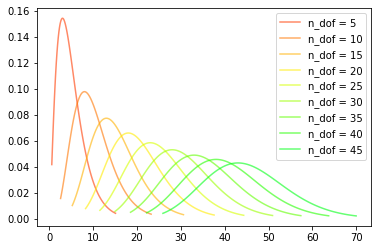

In [61]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

for df in range(5 , 50 , 5):
    x = np.linspace(chi2.ppf(0.01, df),
                    chi2.ppf(0.99, df), 100)
    ax.plot(x, chi2.pdf(x, df),
        color=plt.colormaps['hsv'](df*2) , alpha=0.6, label=f'n_dof = {df}')
    
plt.legend()
plt.show()

___

## تابع درست‌نمایی (Likelihood Function)
تابع درست‌نمایی یکی از مفاهیم کلیدی در آمار است که برای یافتن بهترین پارامترهای مدل استفاده می‌شود.
  
تابع درست‌نمایی، احتمال مشاهده داده‌ها را با توجه به پارامترهای مدل بیان می‌کند. برای داده‌های مستقل با توزیع نرمال، تابع درست‌نمایی به صورت زیر تعریف می‌شود:

$$ \mathcal{L}(\vec{\theta}) = \prod_{i=1}^N P(y_{i} | {\vec{\theta}}) $$

در اینجا احتمال شرطی P نشان دهنده‌ی احتمال مشاهده‌ی مقدار $y_i$ در صورت درست بودن مقادیر $\vec{\theta}$ می‌باشد. بدیهی است که این تعریف امکان وارد کردن هر گونه توزیع احتمالاتی را از سمت نظریه و تئوری برای سنجیدن آزمایش به ما می‌دهد. به طور خاص اگر این احتمال به شکل تابع زنگوله ای باشد خواهیم داشت:

$$ \mathcal{L}(\theta) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma_i^2}} \exp\left(-\frac{(y_i - f(x_i; \theta))^2}{2\sigma_i^2}\right) $$


حال اگر $\sigma_i = \sigma$ باشند، یعنی مقدار خطا ارتباطی به مقدار x نداشته باشد خواهیم داشت:

$$ \mathcal{L}(\theta) = \frac{1}{\sqrt{2\pi\sigma^2}^N} \exp\sum_{i=1}^N\left(-\frac{(y_i - f(x_i; \theta))^2}{2\sigma^2}\right) $$

در اینصورت به سادگی می‌توان نشان داد که 

$$ - \ln \mathcal{L}(\theta) =a_0 + b_0 \times \chi^2$$

بنابر این در واقع کمینه کردن مقدار $\chi^2$ هم عرض بیشینه کردن مقدار تابع درست نمایی بوده است.

این موضوع نشان میدهد که استفاده از $\chi^2$ برای برازش می‌تواند به راحتی از طریق مفهوم $ \mathcal{L}(\theta)$ گسترش یابد.

## استفاده از ابزارهای موجود برای برازش

در این درس تا به حال مفاهیم مربوط به برازش مرور شد، بدیهی است برای موارد پیچیده نیازمند بهینه سازی هایی هستیم تا محاسبات با دقت صورت گیرد. این موضوع شامل یافتن نقطه ی کمینه با دقت بسیار بالاتر و محاسبه ی مشتقات نیز می‌باشد.

در دسترس ترین کد برای انجام برازش، کتابخانه‌ی `scipy.optimize` است. در این کتابخانه تابع `scipy.optimize.curve_fit`
کار برازش و محاسبه ی ماتریس کوواریانس را انجام می‌دهد.
برای جزئیات بیشتر اطلاعات مربوطه را در [اینجا](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) مطالعه کنید

## تکلیف
````{card} به دست آوردن توزیع $\chi^2$

تکلیف برازش
^^^

## هدف
در این تکلیف، شما با استفاده از تولید اعداد تصادفی و برازش یک تابع گاوسی (نرمال) بر روی داده‌ها، توزیع کای-دو (χ²) را بررسی خواهید کرد. هدف این است که ببینید توزیع مقادیر کمینه‌ی χ² چه شکلی دارد و چگونه به توزیع کای-دو مرتبط می‌شود.

## مراحل انجام کار

### ۱. تولید داده‌های تصادفی
1. یک تابع گاوسی با پارامترهای زیر تعریف کنید:
   - میانگین ($ \mu $): ۰
   - انحراف معیار ($ \sigma $): ۱
   - دامنه $ x $: از -۵ تا ۵ با گام‌های ۰٫۱

2. برای هر نقطه $ x $، مقدار تابع گاوسی را محاسبه کنید و به آن نویز گاوسی با انحراف معیار ۰٫۱ اضافه کنید. این داده‌های نویزی را به عنوان داده‌های آزمایشی در نظر بگیرید.

### ۲. برازش تابع گاوسی
1. تابع گاوسی زیر را برای برازش روی داده‌ها تعریف کنید:

   $$
   f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
   $$

2. با استفاده از روش کمترین مربعات (Least Squares)، پارامترهای $ \mu $ و $ \sigma $ را به گونه‌ای پیدا کنید که تابع گاوسی بهترین برازش را به داده‌های نویزی داشته باشد. مقدار χ² را برای این برازش محاسبه کنید.

### ۳. تکرار آزمایش
1. آزمایش بالا را ۱۰۰۰ بار تکرار کنید. در هر تکرار:
   - داده‌های نویزی جدید تولید کنید.
   - تابع گاوسی را برازش کنید.
   - مقدار χ² را محاسبه و ذخیره کنید.
   - ماتریس `covariance` را نیز در هر مرحله ذخیره کنید.

### ۴. تحلیل نتایج
1. هیستوگرام مقادیر χ² را رسم کنید.
2. توزیع کای-دو نظری با درجات آزادی مناسب را روی هیستوگرام رسم کنید و با توزیع تجربی مقایسه کنید.
3. میانگین و واریانس مقادیر χ² را محاسبه و با مقادیر نظری توزیع کای-دو مقایسه کنید.
4. توزیع مقادیر موجود در ماتریس `covariance` را رسم کنید. چه نتیجه ای می‌توانید از آن بگیرید؟

## سوالات

1. **هیستوگرام χ²:**  
   هیستوگرام مقادیر χ² را رسم کنید. آیا شکل آن شبیه به توزیع کای-دو است؟ چرا؟

2. **درجات آزادی:**  
   با توجه به تعداد پارامترهای برازش‌شده ($ \mu $ و $ \sigma $)، درجات آزادی توزیع کای-دو را محاسبه کنید. آیا این درجات آزادی با شکل هیستوگرام مطابقت دارد؟

3. **میانگین و واریانس:**  
   میانگین و واریانس مقادیر χ² را محاسبه کنید. آیا این مقادیر با مقادیر نظری توزیع کای-دو ($ \text{average} = k $ و $ \text{variance} = 2k $) مطابقت دارند؟

4. **تأثیر نویز:**  
   اگر انحراف معیار نویز را تغییر دهید (مثلاً به ۰٫۲ افزایش دهید)، چه تغییری در توزیع χ² مشاهده می‌کنید؟ آیا این تغییر با تئوری همخوانی دارد؟

5. **برازش توزیع کای-دو:**  
   با استفاده از روش‌های برازش، توزیع کای-دو نظری را به هیستوگرام مقادیر χ² برازش دهید. پارامترهای برازش‌شده چقدر با مقادیر نظری تفاوت دارند؟

+++
## نکات
- از کتابخانه‌های علمی مانند `numpy`، `scipy` و `matplotlib` در پایتون استفاده کنید.
- برای برازش تابع گاوسی می‌توانید از تابع `curve_fit` در `scipy.optimize` استفاده کنید.
- برای رسم توزیع کای-دو نظری از تابع `chi2.pdf` در `scipy.stats` استفاده کنید.

````